In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column1 = ['FICE (Federal ID number)', 'College name', 'State (postal code)', 'Type (I, IIA, or IIB)',
          'Average salary - full professors', 'Average salary - associate professors',
          'Average salary - assistant professors', 'Average salary - all ranks',
          'Average compensation - full professors', 'Average compensation - associate professors',
          'Average compensation - assistant professors', 'Average compensation - all ranks',
          'Number of full professors', 'Number of associate professors', 'Number of assistant professors',
          'Number of instructors', 'Number of faculty - all ranks']

a = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/aaup.data', names = column1)

a

,FICE (Federal ID number),College name,State (postal code),"Type (I, IIA, or IIB)",Average salary - full professors,Average salary - associate professors,Average salary - assistant professors,Average salary - all ranks,Average compensation - full professors,Average compensation - associate professors,Average compensation - assistant professors,Average compensation - all ranks,Number of full professors,Number of associate professors,Number of assistant professors,Number of instructors,Number of faculty - all ranks
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,567,485,471,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,914,753,572,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,716,663,442,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,825,681,557,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,530,444,376,423,59,77,102,24,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,502,419,369,431,54,43,29,11,137
1157,3827,West Virginia University,WV,I,535,431,361,439,642,521,438,529,335,237,272,22,895
1158,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,572,494,434,495,25,22,24,3,74
1159,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,486,416,348,381,8,20,25,12,65


**Question 1: Is there a significant variation in the number of faculty across different states in the United States?**

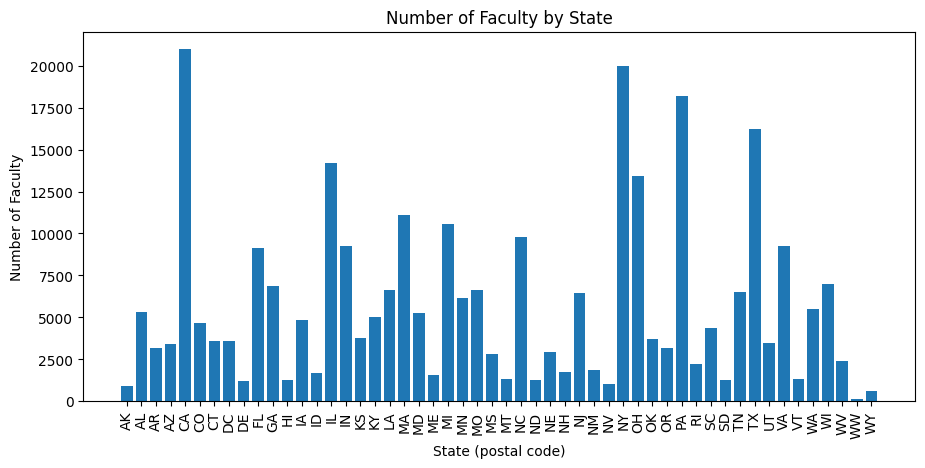

In [30]:


faculty_by_state = a.groupby('State (postal code)')['Number of faculty - all ranks'].sum()

plt.bar(faculty_by_state.index, faculty_by_state.values)
plt.subplots_adjust(left=0.2, right=1.5)
plt.xlabel('State (postal code)')
plt.ylabel('Number of Faculty')
plt.title('Number of Faculty by State')
plt.xticks(rotation=90)
plt.show()




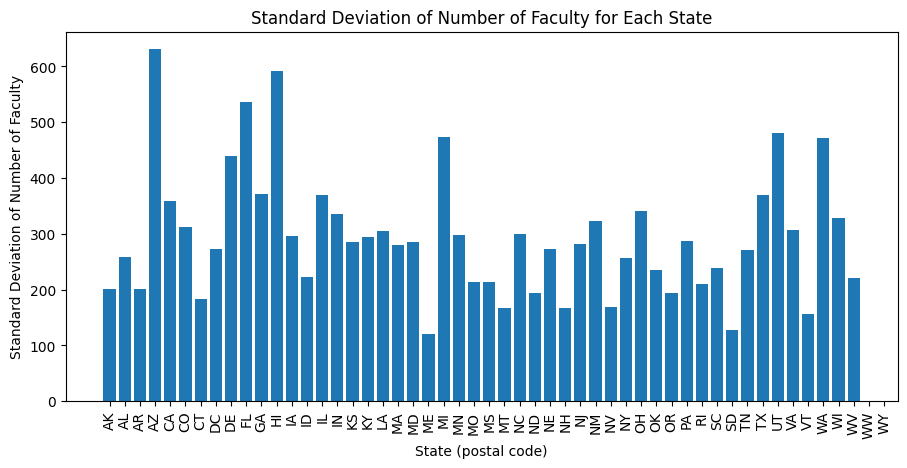

In [29]:
state_stats = a.groupby('State (postal code)').agg({'Number of faculty - all ranks': ['std']})

state_stats.columns = ['_'.join(col).strip() for col in state_stats.columns.values]

state_stats = state_stats.reset_index()

plt.bar(state_stats['State (postal code)'], state_stats['Number of faculty - all ranks_std'])
plt.subplots_adjust(left=0.2, right=1.5)
plt.title('Standard Deviation of Number of Faculty for Each State')
plt.xlabel('State (postal code)')
plt.ylabel('Standard Deviation of Number of Faculty')
plt.xticks(rotation=90)
plt.show()

**Question 2: What is the PMF and CDF of average salaries across all ranks for faculty members?**

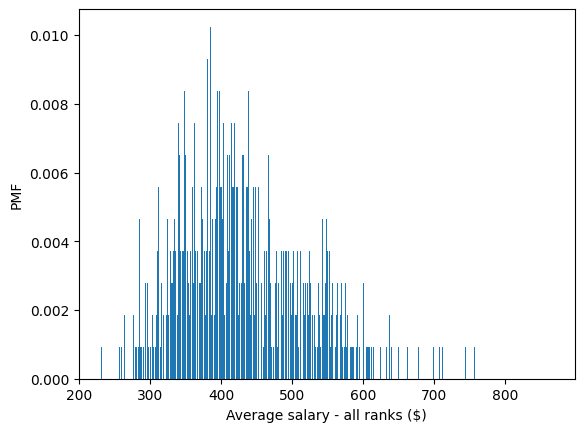

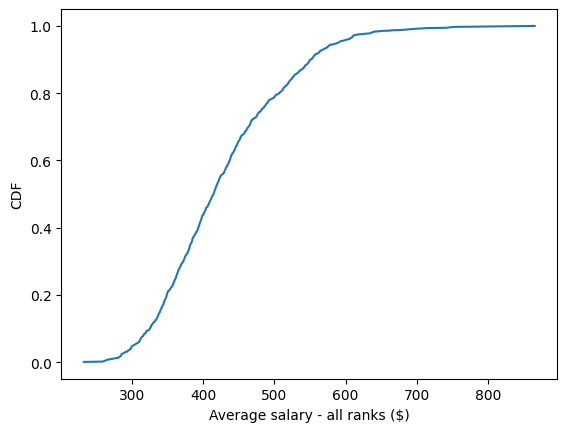

In [327]:

a.replace('*', pd.NA, inplace=True)
a.dropna(inplace=True)

salary_data = a['Average salary - all ranks'].values.astype(int)

values, counts = np.unique(salary_data, return_counts=True)

pmf = counts / len(salary_data)

plt.bar(values, pmf)
plt.xlabel('Average salary - all ranks ($)')
plt.ylabel('PMF')
plt.show()

cdf = np.cumsum(pmf)

plt.plot(values, cdf)
plt.xlabel('Average salary - all ranks ($)')
plt.ylabel('CDF')
plt.show()

**Question 3: Is there a correlation between the average salary and the average compensation of faculty members?
For example, do colleges that pay their faculties more also provide higher compensation?**

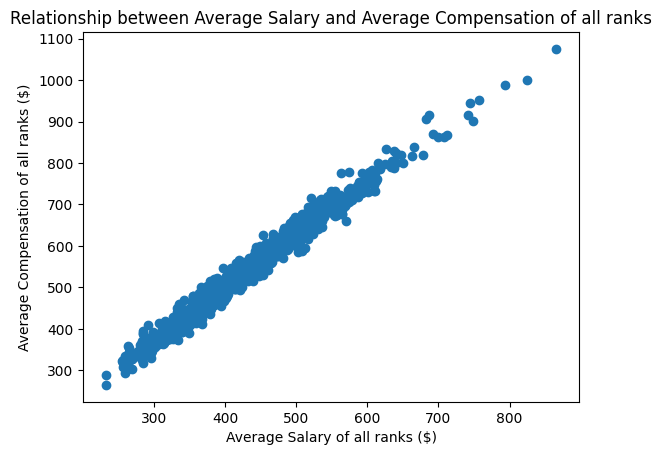

In [19]:
avg_salary = a['Average salary - all ranks'].astype(float)
avg_compensation = a['Average compensation - all ranks'].astype(float)

plt.scatter(avg_salary, avg_compensation)
plt.xlabel('Average Salary of all ranks ($)')
plt.ylabel('Average Compensation of all ranks ($)')
plt.title('Relationship between Average Salary and Average Compensation of all ranks')

plt.show()


**Question 4: Does the average compensation of faculty members vary based on the location of the college? 
For example, do colleges in certain states pay their faculty members more than colleges in other states?**

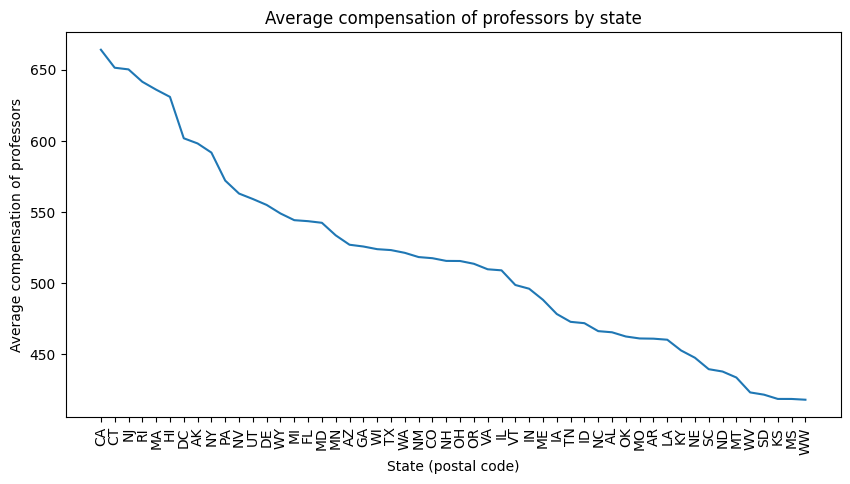

In [20]:

state_compensation = a.groupby('State (postal code)')['Average compensation - all ranks'].mean()

state_compensation = state_compensation.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.plot(state_compensation.index, state_compensation.values)
plt.xticks(rotation=90)
plt.xlabel('State (postal code)')
plt.ylabel('Average compensation of professors')
plt.title('Average compensation of professors by state')
plt.show()


**Question 5: Is there a significant difference in the median number of faculty members among different types of colleges in the United States?**

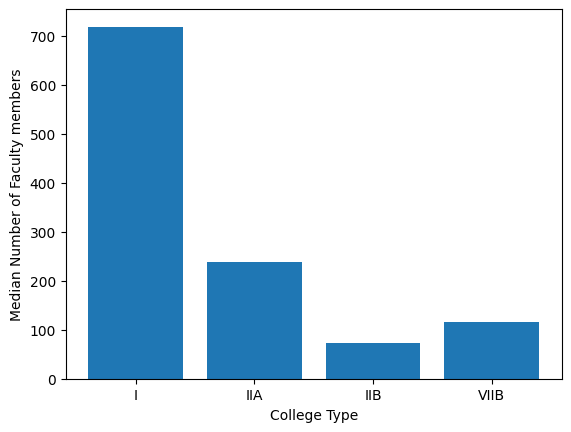

In [21]:

type_median_faculty = a.groupby('Type (I, IIA, or IIB)')['Number of faculty - all ranks'].median()

plt.bar(type_median_faculty.index, type_median_faculty.values)
plt.xlabel('College Type')
plt.ylabel('Median Number of Faculty members')
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

column2 = ['FICE (Federal ID number)', 'College name', 'State (postal code)', 
           'Public/private indicator (public=1, private=2)', 'Average Math SAT score',
           'Average Verbal SAT score', 'Average Combined SAT score', 'Average ACT score',
           'First quartile - Math SAT', 'Third quartile - Math SAT', 'First quartile - Verbal SAT',
           'Third quartile - Verbal SAT', 'First quartile - ACT', 'Third quartile - ACT',
           'Number of applications received', 'Number of applicants accepted', 
           'Number of new students enrolled', "Pct. new students from top 10\%' of H.S. class",
           "Pct. new students from top 25\%' of H.S. class", 'Number of fulltime undergraduates',
           'Number of parttime undergraduates', 'In-state tuition', 'Out-of-state tuition',
           'Room and board costs', 'Room costs', 'Board costs', 'Additional fees',
           'Estimated book costs', 'Estimated personal spending', 'Pct. of faculty with Ph.Ds',
           'Pct. of faculty with terminal degree', 'Student/faculty ratio', 'Pct.alumni who donate',
           'Instructional expenditure per student', 'Graduation rate']

b = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/usnews.data', names = column2)

b


,FICE (Federal ID number),College name,State (postal code),"Public/private indicator (public=1, private=2)",Average Math SAT score,Average Verbal SAT score,Average Combined SAT score,Average ACT score,First quartile - Math SAT,Third quartile - Math SAT,...,Board costs,Additional fees,Estimated book costs,Estimated personal spending,Pct. of faculty with Ph.Ds,Pct. of faculty with terminal degree,Student/faculty ratio,Pct.alumni who donate,Instructional expenditure per student,Graduation rate
0,1061,Alaska Pacific University,AK,2,490,482,972,20,440,530,...,2500,130,800,1500,76,72,11.9,2,10922,15
1,1063,University of Alaska at Fairbanks,AK,1,499,462,961,22,*,*,...,1790,155,650,2304,67,*,10.0,8,11935,*
2,1065,University of Alaska Southeast,AK,1,*,*,*,*,*,*,...,2250,34,500,1162,39,51,9.5,*,9584,39
3,11462,University of Alaska at Anchorage,AK,1,459,422,881,20,*,*,...,2520,114,580,1260,48,*,13.7,6,8046,*
4,1002,Alabama Agri. & Mech. Univ.,AL,1,*,*,*,17,*,*,...,1442,155,500,850,53,53,14.3,*,7043,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3826,West Virginia State College,WV,1,*,*,*,18,*,*,...,1700,50,750,750,38,38,19.2,4,3839,*
1298,3827,West Virginia University,WV,1,507,439,946,22,450,560,...,2026,*,*,*,83,86,13.4,*,8318,57
1299,3830,West Virginia Wesleyan College,WV,2,489,439,928,23,420,560,...,2025,*,450,1100,58,81,16.4,42,8080,67
1300,3831,Wheeling Jesuit College,WV,2,479,433,912,22,410,520,...,2445,*,600,600,66,71,14.1,27,7494,72


**Question 6: Is there a statistically significant difference in acceptance and enrollment rates between private and public colleges?**

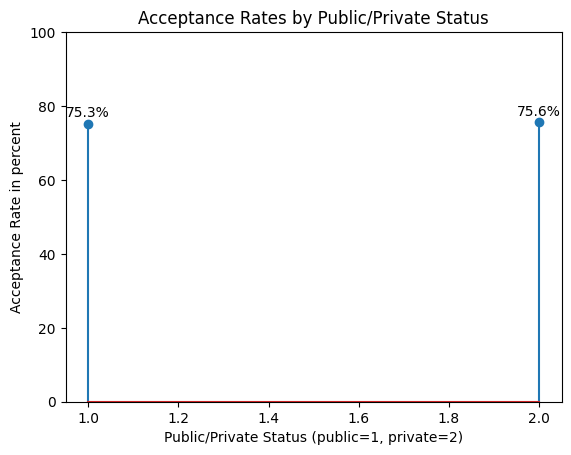

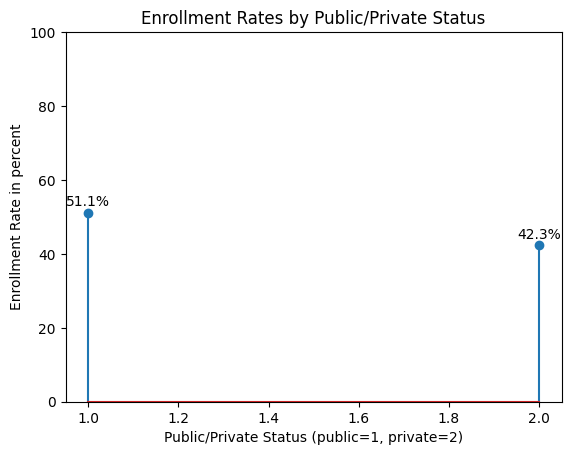

In [23]:

acceptance_data = b[['Public/private indicator (public=1, private=2)', 'Number of applications received', 'Number of applicants accepted']]
acceptance_data = acceptance_data.dropna()
acceptance_data = acceptance_data.apply(pd.to_numeric, errors='coerce')
acceptance_data['Acceptance Rate'] = (acceptance_data['Number of applicants accepted'] / acceptance_data['Number of applications received']) * 100
acceptance_rates = acceptance_data.groupby('Public/private indicator (public=1, private=2)')['Acceptance Rate'].mean()

plt.stem(acceptance_rates.index, acceptance_rates.values)
plt.xlabel('Public/Private Status (public=1, private=2)')
plt.ylabel('Acceptance Rate in percent')
plt.ylim(0, 100)
plt.title('Acceptance Rates by Public/Private Status')

for i, v in enumerate(acceptance_rates.values):
    plt.annotate(f'{v:.1f}%', xy=(acceptance_rates.index[i], v), xytext=(0, 5), textcoords='offset points', ha='center')

plt.show()


enrollment_data = b[['Public/private indicator (public=1, private=2)', 'Number of new students enrolled', 'Number of applicants accepted']]
acceptance_data = acceptance_data.dropna()
enrollment_data = enrollment_data.apply(pd.to_numeric, errors='coerce')
enrollment_data['Enrollment Rate'] = (enrollment_data['Number of new students enrolled'] / enrollment_data['Number of applicants accepted']) * 100
enrollment_rates = enrollment_data.groupby('Public/private indicator (public=1, private=2)')['Enrollment Rate'].mean()

plt.stem(enrollment_rates.index, enrollment_rates.values)
plt.xlabel('Public/Private Status (public=1, private=2)')
plt.ylabel('Enrollment Rate in percent')
plt.ylim(0, 100)
plt.title('Enrollment Rates by Public/Private Status')

for i, v in enumerate(enrollment_rates.values):
    plt.annotate(f'{v:.1f}%', xy=(enrollment_rates.index[i], v), xytext=(0, 5), textcoords='offset points', ha='center')

plt.show()



**Question 7: What is the proportion of colleges by comparison of in-state and out-of-state tuition fees?**

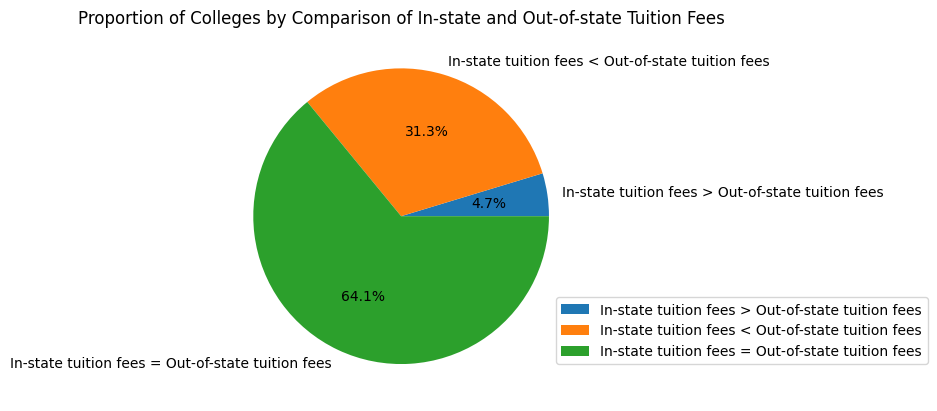

In [24]:

num_greater = b[b['In-state tuition'] > b['Out-of-state tuition']]['College name'].count()
num_less = b[b['In-state tuition'] < b['Out-of-state tuition']]['College name'].count()
num_equal = b[b['In-state tuition'] == b['Out-of-state tuition']]['College name'].count()


labels = ['In-state tuition fees > Out-of-state tuition fees', 
          'In-state tuition fees < Out-of-state tuition fees', 
          'In-state tuition fees = Out-of-state tuition fees']
sizes = [num_greater, num_less, num_equal]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Colleges by Comparison of In-state and Out-of-state Tuition Fees')
plt.legend(bbox_to_anchor=(0.9, 0.3))
plt.show()

**Question 8: What are the top 50 colleges with the highest average total expenditures by a student other than tuition fees?**

C:\Users\_Astitva_Aryan_\AppData\Local\Temp\ipykernel_11732\4178808185.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  top_50_colleges.loc[:, expenditure_cols] = top_50_colleges.loc[:, expenditure_cols].apply(pd.to_numeric, errors='coerce')


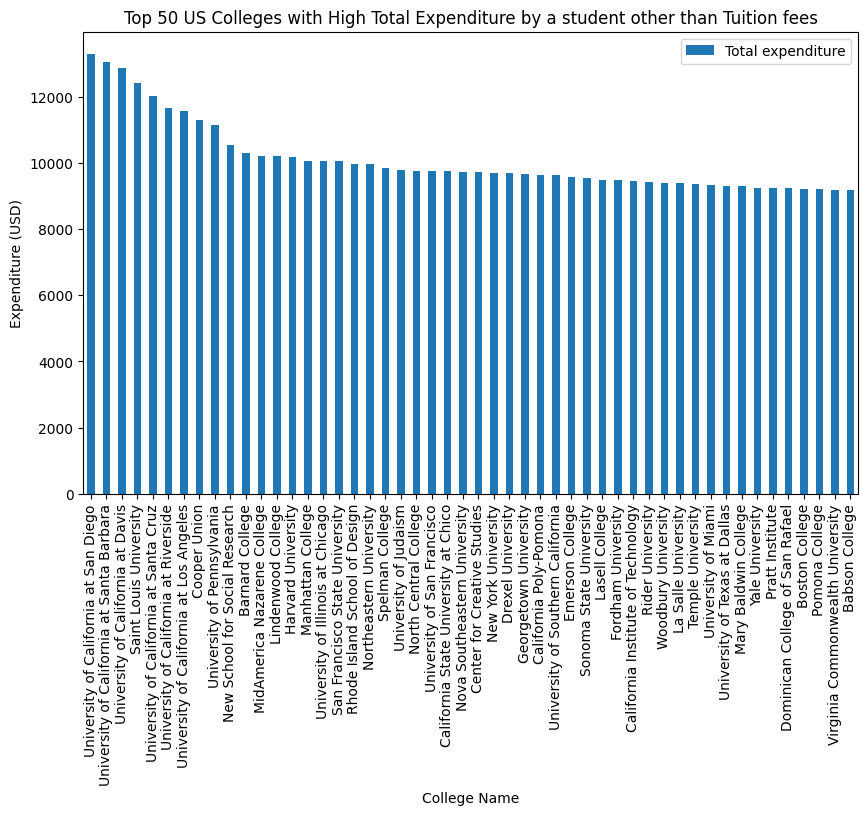

In [25]:

top_50_colleges = b.copy()
expenditure_cols = ['Room and board costs', 'Additional fees', 'Estimated book costs', 'Estimated personal spending']
top_50_colleges.loc[:, expenditure_cols] = top_50_colleges.loc[:, expenditure_cols].apply(pd.to_numeric, errors='coerce')
top_50_colleges['Total expenditure'] = top_50_colleges[expenditure_cols].sum(axis=1)
top_50_colleges = top_50_colleges.sort_values(by="Total expenditure", ascending=False).head(50)

top_50_colleges.plot(kind='bar', x='College name', y='Total expenditure', figsize=(10,6))
plt.title('Top 50 US Colleges with High Total Expenditure by a student other than Tuition fees')
plt.xlabel('College Name')
plt.ylabel('Expenditure (USD)')
plt.show()

**Question 9: What are the top 50 colleges with the lowest graduation rates in the USA?**

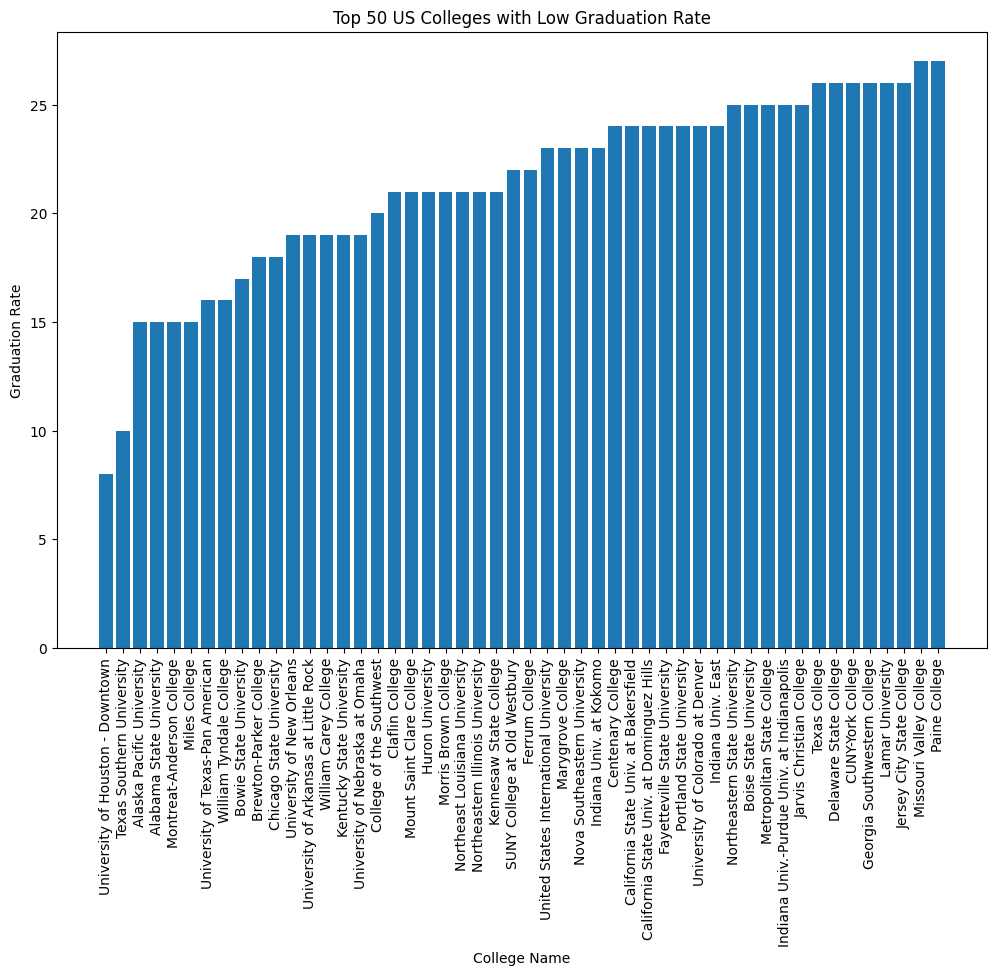

In [26]:
b = b.copy()
b['Graduation rate'] = pd.to_numeric(b['Graduation rate'], errors='coerce')
top_50_colleges = b.sort_values('Graduation rate', ascending=True).head(50)

plt.figure(figsize=(12, 8))
plt.bar(top_50_colleges['College name'], top_50_colleges['Graduation rate'])
plt.xticks(rotation=90)
plt.title('Top 50 US Colleges with Low Graduation Rate')
plt.xlabel('College Name')
plt.ylabel('Graduation Rate')
plt.show()

**Question 10: What is the relationship between the acceptance rate and the average SAT score of the top 50 US colleges?**

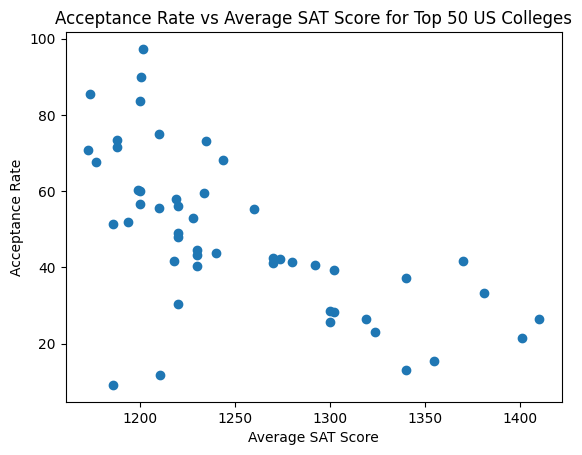

In [27]:

acceptance_data = b[['Average Combined SAT score', 'Number of applications received', 'Number of applicants accepted']]
acceptance_data = acceptance_data.replace('*', 0)
acceptance_data = acceptance_data.apply(pd.to_numeric)
acceptance_data['Acceptance Rate'] = (acceptance_data['Number of applicants accepted'] / acceptance_data['Number of applications received']) * 100
top_50_colleges = acceptance_data.sort_values(by='Average Combined SAT score', ascending=False).head(50)

plt.scatter(top_50_colleges['Average Combined SAT score'], top_50_colleges['Acceptance Rate'])
plt.title('Acceptance Rate vs Average SAT Score for Top 50 US Colleges')
plt.ylabel('Acceptance Rate')
plt.xlabel('Average SAT Score')
plt.show()